In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'positions/2p5/5apr20242p5_h_2p5_2_100ul_5apr - 6 Image 8.csv'

In [3]:
df = pd.read_csv(file_path, skiprows=1)
df['Time']=df['Time']*0.05
df


,Position X,Position Y,Unit,Category,Collection,Time,TrackID,ID
0,98.355598,10.164600,µm,Spot,Position,0.05,1000001909,1909
1,43.006001,20.691500,µm,Spot,Position,0.05,1000003953,3953
2,124.055000,21.093201,µm,Spot,Position,0.05,1000004036,4036
3,46.469898,21.599600,µm,Spot,Position,0.05,1000004137,4137
4,99.774498,25.017300,µm,Spot,Position,0.05,1000004791,4791
...,...,...,...,...,...,...,...,...
9544,90.376900,109.834999,µm,Spot,Position,15.00,1004388994,7081760
9545,90.118698,111.049004,µm,Spot,Position,15.00,1001178511,7081987
9546,89.550697,111.676003,µm,Spot,Position,15.00,1001933184,7082112
9547,142.764008,115.678001,µm,Spot,Position,15.00,1006020672,7082889


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


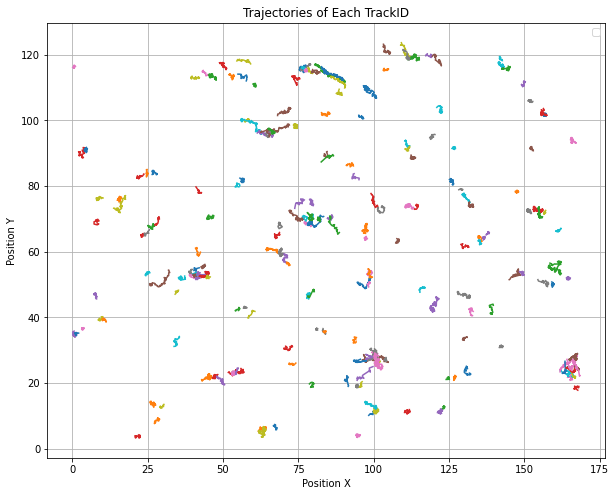

In [4]:
# Sort the dataframe by TrackID and Time
df = df.sort_values(by=['TrackID', 'Time'])

# Plotting the trajectories
plt.figure(figsize=(10, 8))
for track_id, track_data in df.groupby('TrackID'):
    plt.plot(track_data['Position X'], track_data['Position Y'])

plt.title('Trajectories of Each TrackID')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.legend()
plt.grid(True)
plt.show()

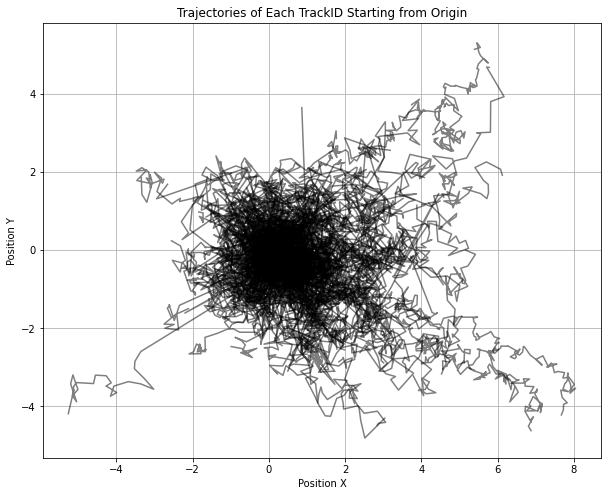

In [13]:
# Sort the dataframe by TrackID and Time
df = df.sort_values(by=['TrackID', 'Time'])

# Function to translate trajectory to origin
def translate_to_origin(track_data):
    initial_x = track_data['Position X'].iloc[0]
    initial_y = track_data['Position Y'].iloc[0]
    track_data['Position X'] -= initial_x
    track_data['Position Y'] -= initial_y
    return track_data

# Plotting the trajectories without markers
plt.figure(figsize=(10, 8))
for track_id, track_data in df.groupby('TrackID'):
    track_data = translate_to_origin(track_data)
    plt.plot(track_data['Position X'], track_data['Position Y'], alpha = 0.5, color='black')
plt.title('Trajectories of Each TrackID Starting from Origin')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.grid(True)
plt.show()